In [ ]:
import json 
from google.colab import files
uploaded=files.upload()

Saving states_daily.json to states_daily.json


In [ ]:
# %load Assn1.py
import pandas as pd
import numpy as np
import json
import copy
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
	

In [ ]:
def Q1_1(json_file_path,start_date, end_date):
    #Loading the given json format as dictionary type into the variable 'data' using the 'json.load' function
    #we get a dictionary with only one key whose format is as follows - {'states_daily':[list of other dictionaries]}
    with open(json_file_path) as data_file:    
        data = json.load(data_file)
    #Now 'data' has one key whole value is the list of dictionaries which further have same 'keys' like 'date','status' , etc. with
    #different values like '14-Mar-20','Confirmed'
    #now Normalizing the keys as columns for each of the dictionaries present in the list of dictionaries of value of data
    my_data=pd.json_normalize(data.get('states_daily'))
    #changing the format of date given in the assignment
    my_data['date']=pd.to_datetime(my_data['date'])
    #sorting our datset according to the date just in case if it is not sorted already
    my_data=my_data.sort_values(by=['date'],ascending=True)
    #typecasting the start_date and end_date into our standard pandas datetime object
    start_date=pd.to_datetime(start_date)
    end_date=pd.to_datetime(end_date)
    #Getting the indexes of rows with start_date and end_date
    startList=my_data[my_data['date']==start_date].index.values
    endList=my_data[my_data['date']==end_date].index.values
    my_data=my_data.loc[startList[0]:endList[len(endList)-1],:]
    #Reordering the columns
    cols=list(my_data.keys())
    ttL=cols.index('tt')
    cols=cols[:ttL]+cols[ttL+1:]
    cols.insert(0,'tt')
    statusL=cols.index('status')
    cols=cols[:statusL]+cols[statusL+1:]
    cols.insert(0,'status')
    dateL=cols.index('date')
    cols=cols[:dateL]+cols[dateL+1:]
    cols.insert(0,'date')
    
    #Reordering the columns in our dataframe 'my_data'
    my_data=my_data[cols]
    #adding the new column for total cases
    my_data['total_cases']=0
    for i in range(3,41):
        my_data['total_cases']=my_data['total_cases']+my_data[cols[i]].astype('int')
    total_count=my_data['total_cases'].sum(axis=0,skipna=True)

    #Changing the position of the column 'total_cases' from last to initial
    #reordering the columns
    cols=list(my_data.keys())
    dateL=cols.index('total_cases')
    cols=cols[:dateL]+cols[dateL+1:]
    cols.insert(0,'total_cases')
    #reordering the columns in our dataframe 'my_data'
    my_data=my_data[cols]
    my_data=my_data.drop(['tt'],axis=1)
    #Rows with 'Confirmed' status
    confirmRows=my_data[my_data['status']=='Confirmed'].iloc[:,0:3]
    confirmed_count=confirmRows['total_cases'].sum(axis=0,skipna=True)
    #Rows with 'Recovered' status
    recoveredRows=my_data[my_data['status']=='Recovered']
    recovered_count=recoveredRows['total_cases'].sum(axis=0,skipna=True)
    #Rows with 'Deceased' status
    deceasedRows=my_data[my_data['status']=='Deceased']
    deceased_count=deceasedRows['total_cases'].sum(axis=0,skipna=True)
    print('confirmed_count: ',confirmed_count, 'recovered_count: ',recovered_count, 'deceased_count: ',deceased_count)
    return confirmed_count, recovered_count, deceased_count
start_date='14-Mar-2020'
end_date='05-sep-2020'
json_file_path='states_daily.json'
Q1_1(json_file_path,start_date,end_date)

confirmed_count:  4110214 recovered_count:  3177666 deceased_count:  70095


(4110214, 3177666, 70095)

In [ ]:
def Q1_2(json_file_path, start_date, end_date):

    #First Loading the given json format as dictionary type into the variable 'data' using the 'json.load' function
    #we get a dictionary with only one key whose format is as follows - {'states_daily':[list of other dictionaries]}
    with open(json_file_path) as data_file:    
        data = json.load(data_file)

    #'data' has one key whole value is the list of dictionaries which further have same 'keys' like 'date','status' , etc. with
    #different values like '14-Mar-20','Confirmed'
    #Normalizing the keys as columns for each of the dictionaries present in the list of dictionaries of value of data
    my_data=pd.json_normalize(data.get('states_daily'))
    #changing the format of date given in the assignment
    my_data['date']=pd.to_datetime(my_data['date'])
    #sorting our datset according to the date just in case if it is not sorted already
    my_data=my_data.sort_values(by=['date'],ascending=True)
    #typecasting the start_date and end_date into our standard pandas datetime object
    start_date=pd.to_datetime(start_date)
    end_date=pd.to_datetime(end_date)
    #getting the indexes of rows with start_date and end_date
    startList=my_data[my_data['date']==start_date].index.values
    endList=my_data[my_data['date']==end_date].index.values
    #Slicing our data set between the given dates and the columns 'status' and 'date'
    my_data=my_data.loc[startList[0]:endList[len(endList)-1],:]
    
    #we just need the 'dl' column along with date and status in our new dataset
    my_data=my_data.loc[:,['status','dl']]
    #converting the 'dl' column into 'int'
    #converting the 'tt' column in 'my_data' to integer 
    convert_dict={
        'dl':'int'
    }
    my_data=my_data.astype(convert_dict)
    #Rows with 'Confirmed' status
    confirmRows=my_data[my_data['status']=='Confirmed'].iloc[:,1]
    confirmed_count=confirmRows.sum(axis=0,skipna=True)
    #Rows with 'Recovered' status
    recoveredRows=my_data[my_data['status']=='Recovered'].iloc[:,1]
    recovered_count=recoveredRows.sum(axis=0,skipna=True)
    #Rows with 'Deceased' status
    deceasedRows=my_data[my_data['status']=='Deceased'].iloc[:,1]
    deceased_count=deceasedRows.sum(axis=0,skipna=True)
    print('confirmed_count: ',confirmed_count, 'recovered_count: ',recovered_count, 'deceased_count: ',deceased_count)
    return confirmed_count, recovered_count, deceased_count
    
start_date='14-Mar-2020'
end_date='05-sep-2020'
json_file_path='states_daily.json'
Q1_2(json_file_path,start_date,end_date)

confirmed_count:  188193 recovered_count:  163785 deceased_count:  4538


(188193, 163785, 4538)

In [ ]:
def Q1_3(json_file_path, start_date, end_date):
    #Loading the given json format as dictionary type into the variable 'data' using the 'json.load' function
    #we get a dictionary with only one key whose format is as follows - {'states_daily':[list of other dictionaries]}
    with open(json_file_path) as data_file:    
        data = json.load(data_file)

    #'data' has one key whole value is the list of dictionaries which further have same 'keys' like 'date','status' , etc. with
    #different values like '14-Mar-20','Confirmed'
    #now Normalizing the keys as columns for each of the dictionaries present in the list of dictionaries of value of data
    my_data=pd.json_normalize(data.get('states_daily'))
    #changing the format of date given in the assignment
    my_data['date']=pd.to_datetime(my_data['date'])
    #sorting our datset according to the date just in case if it is not sorted already
    my_data=my_data.sort_values(by=['date'],ascending=True)
    #typecasting the start_date and end_date into our standard pandas datetime object
    start_date=pd.to_datetime(start_date)
    end_date=pd.to_datetime(end_date)
    #Getting the indexes of rows with start_date and end_date
    startList=my_data[my_data['date']==start_date].index.values
    endList=my_data[my_data['date']==end_date].index.values
    
    #Slicing our data set between the given dates and the columns 'status' and 'date'
    my_data=my_data.loc[startList[0]:endList[len(endList)-1],:]
    #we just need the 'dl' and 'mh' columns along with date and status in our new dataset
    my_data=my_data.loc[:,['date','status','dl','mh']]
    #converting the 'dl' and 'mh' column into 'int'
    #converting the 'tt' column in 'my_data' to integer 
    convert_dict={
        'dl':'int',
        'mh':'int'
    }
    my_data=my_data.astype(convert_dict)
    #making a new column which includes the sum of delhi and maharashtra values
    my_data['dl+mh']=my_data['dl']+my_data['mh']
    #Rows with 'Confirmed' status
    confirmRows=my_data[my_data['status']=='Confirmed'].iloc[:,4]
    confirmed_count=confirmRows.sum(axis=0,skipna=True)
    #Rows with 'Recovered' status
    recoveredRows=my_data[my_data['status']=='Recovered'].iloc[:,4]
    recovered_count=recoveredRows.sum(axis=0,skipna=True)
    #Rows with 'Deceased' status
    deceasedRows=my_data[my_data['status']=='Deceased'].iloc[:,4]
    deceased_count=deceasedRows.sum(axis=0,skipna=True)
    
    print('confirmed_count: ',confirmed_count, 'recovered_count: ',recovered_count, 'deceased_count: ',deceased_count)
    return confirmed_count, recovered_count, deceased_count

start_date='14-Mar-2020'
end_date='05-sep-2020'
json_file_path='states_daily.json'
Q1_3(json_file_path,start_date,end_date)


confirmed_count:  1072055 recovered_count:  800359 deceased_count:  30813


(1072055, 800359, 30813)

In [ ]:
def Q1_4(json_file_path, start_date, end_date):
  #Loading the Dataset given in json format as dictionary type into the variable 'state_data' using the 'json.load' function
  data = open(json_file_path)
  state_data = json.load(data)
  #'state_data' has one key 'state_daily' and the whole value is the list of dictionaries which further have same 'keys' like 'date','status' , etc. with
  #different values like '14-Mar-20','Confirmed',etc.
  #now Normalizing the keys as columns for each of the dictionaries present in the list of dictionaries of value of state_data
  state_data=pd.json_normalize(state_data.get('states_daily'))
  #typecasting the start_date and end_date into our standard pandas datetime object
  start_d = pd.to_datetime(start_date)
  end_d = pd.to_datetime(end_date)
  #changing the format of date given in the assignment
  state_data['date'] = pd.to_datetime(state_data['date'])
  #getting the index values of the rows with starting and the Ending date
  start_i = state_data[state_data['date'] == start_d].index.values
  end_i = state_data[state_data['date'] == end_d].index.values
  #Dropping the unused columns ahead
  state_data = state_data.drop('date', axis=1) 
  state_data = state_data.drop('tt', axis=1) 
  #start and ending index of the Start and End Dates
  s_i = start_i[0]
  e_i = end_i[2]+1
  #Removing the rows which are not under the Start and the End date
  state_data = state_data.iloc[s_i:e_i]
  #Changing the datatype of the values of all the columns to Int
  status = state_data.pop("status")
  state_data = state_data.astype('int')
  state_data.insert(0,"status",status)
  #Changing the datatype of the values of column Status to String
  state_data['status'] = state_data['status'].astype('string')
  #Removing the union territories and un columns from the data as we need to print data of states only
  col_list = list(state_data)
  un = ['an','dd','dn','dl','jk','ld','la','ch','py','un']
  set1 = set(col_list)
  set2 = set(un)
  states = list(set1-set2)
  for val in un:
    state_data = state_data.drop(val,axis=1)
  states.remove('status')
  #Creating the dictionary for storing the respective cases for each respective state 
  #with keys as state and values as 0
  rec = dict.fromkeys(states,0)
  con = dict.fromkeys(states,0)
  dec = dict.fromkeys(states,0)
  #Calculating the total respective cases for each of the states and storing in the values.
  for i in state_data.index:
    for col in states:
      if(state_data['status'][i] == "Recovered"):
        rec[col] = rec[col] + state_data[col][i]
      elif(state_data['status'][i] == "Confirmed"):
        con[col] = con[col] + state_data[col][i]
      elif(state_data['status'][i] == "Deceased"):
        dec[col] = dec[col] + state_data[col][i]
  
  #Sorting the respective cases dictionary in decreasing order 
  con = dict(sorted(con.items(), key = lambda kv:(kv[1], kv[0]), reverse=True))
  rec = dict(sorted(rec.items(), key = lambda kv:(kv[1], kv[0]), reverse=True))
  dec = dict(sorted(dec.items(), key = lambda kv:(kv[1], kv[0]), reverse=True))
  #Getting the maximum values of respective Cases
  con_val = max(con.values())
  rec_val = max(rec.values())
  dec_val = max(dec.values())
  #Storing all the states with same maximum values of respective cases
  state_con = [key for key in con if con[key] == con_val] 
  state_rec = [key for key in rec if rec[key] == rec_val] 
  state_dec = [key for key in dec if dec[key] == dec_val] 
  #printing the values
  print('\nConfirmed')
  print('Highest affected State is: ', state_con)
  print('Highest affected State count is: ',con_val)
  print('\nRecovered ')
  print('Highest affected State is: ',state_rec)
  print('Highest affected State count is: ',rec_val)
  print('\nDeceased ')
  print('Highest affected State is: ',state_dec)
  print('Highest affected State count is: ',dec_val)
  #return the confirmed,recovered,deceased states and their count respectively.
  return state_con,con_val,state_rec,rec_val,state_dec,dec_val
json_file_path = "states_daily.json"
start_date = '14-Mar-2020'
end_date = '05-Sep-2020' 
Q1_4(json_file_path, start_date, end_date)


Confirmed
Highest affected State is:  ['mh']
Highest affected State count is:  883862

Recovered 
Highest affected State is:  ['mh']
Highest affected State count is:  636574

Deceased 
Highest affected State is:  ['mh']
Highest affected State count is:  26275


(['mh'], 883862, ['mh'], 636574, ['mh'], 26275)

In [ ]:
def Q1_5(json_file_path, start_date, end_date):
  #Loading the Dataset given in json format as dictionary type into the variable 'state_data' using the 'json.load' function
  data = open(json_file_path)
  state_data = json.load(data)
  #'state_data' has one key 'state_daily' and the whole value is the list of dictionaries which further have same 'keys' like 'date','status' , etc. with
  #different values like '14-Mar-20','Confirmed',etc.
  #now Normalizing the keys as columns for each of the dictionaries present in the list of dictionaries of value of state_data
  state_data=pd.json_normalize(state_data.get('states_daily'))
  #typecasting the start_date and end_date into our standard pandas datetime object
  start_d = pd.to_datetime(start_date)
  end_d = pd.to_datetime(end_date)
  #changing the format of date given in the assignment
  state_data['date'] = pd.to_datetime(state_data['date'])
  #getting the index values of the rows with starting and the Ending date
  start_i = state_data[state_data['date'] == start_d].index.values
  end_i = state_data[state_data['date'] == end_d].index.values
  #Dropping the unused columns ahead
  state_data = state_data.drop('date', axis=1) 
  state_data = state_data.drop('tt', axis=1) 
  #start and ending index of the Start and End Dates
  s_i = start_i[0]
  e_i = end_i[2]+1
  #Removing the rows which are not under the Start and the End date
  state_data = state_data.iloc[s_i:e_i]
  #Changing the datatype of the values of all the columns to Int
  status = state_data.pop("status")
  state_data = state_data.astype('int')
  state_data.insert(0,"status",status)
  #Changing the datatype of the values of column Status to String
  state_data['status'] = state_data['status'].astype('string')
  #Removing the union territories and un columns from the data as we need to print data of states only
  col_list = list(state_data)
  un = ['an','dd','dn','dl','jk','ld','la','ch','py','un']
  set1 = set(col_list)
  set2 = set(un)
  states = list(set1-set2)
  for val in un:
    state_data = state_data.drop(val,axis=1)
  states.remove('status')
  #Creating the dictionary for storing the respective cases for each respective state 
  #with keys as state and values as 0
  rec = dict.fromkeys(states,0)
  con = dict.fromkeys(states,0)
  dec = dict.fromkeys(states,0)
  #Calculating the total respective cases for each of the states and storing in the values.
  for i in state_data.index:
    for col in states:
      if(state_data['status'][i] == "Recovered"):
        rec[col] = rec[col] + state_data[col][i]
      elif(state_data['status'][i] == "Confirmed"):
        con[col] = con[col] + state_data[col][i]
      elif(state_data['status'][i] == "Deceased"):
        dec[col] = dec[col] + state_data[col][i]
  
  #Sorting the respective cases dictionary in increasing order 
  con = dict(sorted(con.items(), key = lambda kv:(kv[1], kv[0])))
  rec = dict(sorted(rec.items(), key = lambda kv:(kv[1], kv[0])))
  dec = dict(sorted(dec.items(), key = lambda kv:(kv[1], kv[0])))
  #Getting the minimum values of respective Cases
  con_val = min(con.values())
  rec_val = min(rec.values())
  dec_val = min(dec.values())
  #Storing all the states with same minimum values of respective cases
  state_con = [key for key in con if con[key] == con_val] 
  state_rec = [key for key in rec if rec[key] == rec_val] 
  state_dec = [key for key in dec if dec[key] == dec_val]
  #printing the values
  print('\nConfirmed')
  print('Lowest affected State is: ',state_con)
  print('Lowest affected State count is: ',con_val)
  print('\nRecovered')
  print('Lowest affected State is: ',state_rec)
  print('Lowest affected State count is: ',rec_val)
  print('\nDeceased')
  print('Lowest affected State is: ',state_dec)
  print('Lowest affected State count is: ',dec_val)
  #return the confirmed,recovered,deceased states and their count respectively.
  return state_con,con_val,state_rec,rec_val,state_dec,dec_val

json_file_path = "states_daily.json"
start_date = '14-Mar-2020'
end_date = '05-Sep-2020' 
Q1_5(json_file_path, start_date, end_date)


Confirmed
Lowest affected State is:  ['mz']
Lowest affected State count is:  1062

Recovered
Lowest affected State is:  ['mz']
Lowest affected State count is:  713

Deceased
Lowest affected State is:  ['mz']
Lowest affected State count is:  0


(['mz'], 1062, ['mz'], 713, ['mz'], 0)

In [ ]:
def Q1_6(json_file_path, start_date, end_date):
  #Loading the Dataset given in json format as dictionary type into the variable 'state_data' using the 'json.load' function
  data = open(json_file_path)
  state_data = json.load(data)
  #'state_data' has one key 'state_daily' and the whole value is the list of dictionaries which further have same 'keys' like 'date','status' , etc. with
  #different values like '14-Mar-20','Confirmed',etc.
  #now Normalizing the keys as columns for each of the dictionaries present in the list of dictionaries of value of state_data
  state_data=pd.json_normalize(state_data.get('states_daily'))
  #typecasting the start_date and end_date into our standard pandas datetime object
  start_d = pd.to_datetime(start_date)
  end_d = pd.to_datetime(end_date)
  #changing the format of date given in the assignment
  state_data['date'] = pd.to_datetime(state_data['date'])
  #getting the index values of the rows with starting and the Ending date
  start_i = state_data[state_data['date'] == start_d].index.values
  end_i = state_data[state_data['date'] == end_d].index.values 
  #Dropping the unused columns ahead
  state_data = state_data.drop('tt', axis=1) 
  #start and ending index of the Start and End Dates
  s_i = start_i[0]
  e_i = end_i[2]+1
  #Removing the rows which are not under the Start and the End date
  state_data = state_data.iloc[s_i:e_i]
  #Changing the datatype of the values of all the columns to Int
  status = state_data.pop("status")
  date = state_data.pop("date")
  state_data = state_data.astype('int')
  state_data.insert(0,"status",status)
  state_data.insert(0,"date",date)
  #Changing the datatype of the values of column Status to String
  state_data['status'] = state_data['status'].astype('string')
  #Removing the columns from the data other than Delhi-dl as we need to print data of state Delhi only
  col_list = list(state_data)
  un = ['dl','status','date']
  set1 = set(col_list)
  set2 = set(un)
  states = list(set1-set2)
  for val in states:
    state_data = state_data.drop(val,axis=1)
  #create a set which contains the dates from start_date to end_date
  date_set = set(state_data['date'])
  #Creating the dictionary for storing the respective cases for Delhi state for each respective date
  #with keys as date and values as 0
  rec = dict.fromkeys(date_set,0)
  con = dict.fromkeys(date_set,0)
  dec = dict.fromkeys(date_set,0)
  #Calculating the total respective cases for Delhi on respective dates and storing in the values.
  for i in state_data.index:
    if(state_data['status'][i] == "Recovered"):
      rec[state_data['date'][i]] = state_data['dl'][i]
    elif(state_data['status'][i] == "Confirmed"):
      con[state_data['date'][i]] = state_data['dl'][i]
    elif(state_data['status'][i] == "Deceased"):
      dec[state_data['date'][i]] = state_data['dl'][i]
  #Getting the Maximum value and date from all the dates of respective cases i.e the Spike is the Maximum number of Cases on that date
  con_val = max(con , key=con.get )
  rec_val = max(rec , key=rec.get )
  dec_val = max(dec , key=dec.get )
  #Getting the Spike Dates in the format %d-%b-%Y
  con_date = con_val.strftime('%d-%b-%Y')
  rec_date = rec_val.strftime('%d-%b-%Y')
  dec_date = dec_val.strftime('%d-%b-%Y')
  #Getting the count of the spike of the respective cases 
  confirmed_count = con[con_val]
  recovered_count = rec[rec_val]
  deceased_count = dec[dec_val]
  #Printing the Values
  print('Confirmed\n','Day:' , con_val.strftime('%d-%b-%Y'),'\n' ,'Count:' ,con[con_val])
  print("Recovered\n" ,'Day:' , rec_val.strftime('%d-%b-%Y')  ,'\n','Count:' ,rec[rec_val])
  print("Deceased\n" , 'Day:', dec_val.strftime('%d-%b-%Y') ,'\n','Count:', dec[dec_val])
  return con_date,confirmed_count,rec_date,recovered_count,dec_date,deceased_count
json_file_path = "states_daily.json"
start_date = '14-Mar-2020'
end_date = '05-Sep-2020' 
Q1_6(json_file_path, start_date, end_date)

Confirmed
 Day: 23-Jun-2020 
 Count: 3947
Recovered
 Day: 20-Jun-2020 
 Count: 7725
Deceased
 Day: 16-Jun-2020 
 Count: 437


('23-Jun-2020', 3947, '20-Jun-2020', 7725, '16-Jun-2020', 437)

In [ ]:
def Q1_7(json_file_path, start_date, end_date):
  #Loading the Dataset given in json format as dictionary type into the variable 'state_data' using the 'json.load' function
  data = open(json_file_path)
  state_data = json.load(data)
  #'state_data' has one key 'state_daily' and the whole value is the list of dictionaries which further have same 'keys' like 'date','status' , etc. with
  #different values like '14-Mar-20','Confirmed',etc.
  #now Normalizing the keys as columns for each of the dictionaries present in the list of dictionaries of value of state_data
  state_data=pd.json_normalize(state_data.get('states_daily'))
  #typecasting the start_date and end_date into our standard pandas datetime object
  start_d = pd.to_datetime(start_date)
  end_d = pd.to_datetime(end_date)
  #changing the format of date given in the assignment
  state_data['date'] = pd.to_datetime(state_data['date'])
  #getting the index values of the rows with starting and the Ending date
  start_i = state_data[state_data['date'] == start_d].index.values
  end_i = state_data[state_data['date'] == end_d].index.values
  #Dropping the unused columns ahead
  state_data = state_data.drop('date', axis=1) 
  state_data = state_data.drop('tt', axis=1) 
  #start and ending index of the Start and End Dates
  s_i = start_i[0]
  e_i = end_i[2]+1
  #Removing the rows which are not under the Start and the End date
  state_data = state_data.iloc[s_i:e_i]
  #Changing the datatype of the values of all the columns to Int
  status = state_data.pop("status")
  state_data = state_data.astype('int')
  state_data.insert(0,"status",status)
  #Changing the datatype of the values of column Status to String
  state_data['status'] = state_data['status'].astype('string')
  #Removing the union territories and un columns from the data as we need to print data of states only
  col_list = list(state_data)
  un = ['an','dd','dn','dl','jk','ld','la','ch','py','un']
  set1 = set(col_list)
  set2 = set(un)
  states = list(set1-set2)
  for val in un:
    state_data = state_data.drop(val,axis=1)
  states.remove('status')
  #Creating the dictionary for storing the respective cases along with active cases for each respective state 
  #with keys as state and values as 0
  rec = dict.fromkeys(states,0)
  con = dict.fromkeys(states,0)
  dec = dict.fromkeys(states,0)
  active_data = dict.fromkeys(states,0)
  #Calculating the total respective cases and calculating active cases for each of the states and storing in the values.
  for i in state_data.index:
    for col in states:
      if(state_data['status'][i] == "Recovered" ):
        rec[col] = rec[col] + state_data[col][i]
      elif(state_data['status'][i] == "Confirmed"):
        con[col] = con[col] + state_data[col][i]
      elif(state_data['status'][i] == "Deceased"):
        dec[col] = dec[col] + state_data[col][i]
      active_data[col] = con[col] - (rec[col] + dec[col])
  #printing the Active Cases on the end Date
  print("Active cases on", end_d.strftime("%d-%b-%Y"))
  print ("{:<10} {:<10}".format('States', 'Active Cases'))   
  for key, value in active_data.items(): 
    Active_cases = value 
    States = key
    print ("{:<10} {:<10}".format(States, Active_cases))
  #returning the active cases as a Dictionary with keys as state and values as active cases
  return active_data
json_file_path = "states_daily.json"
start_date = '14-Mar-2020'
end_date = '05-Sep-2020' 
Q1_7(json_file_path, start_date, end_date)

Active cases on 05-Sep-2020
States     Active Cases
gj         16266     
ka         100224    
ar         1525      
ml         1374      
ut         7649      
br         16735     
mz         349       
nl         701       
wb         23390     
ap         100880    
jh         14980     
kl         21867     
mp         15687     
mn         1872      
up         59963     
or         25856     
tg         32405     
tn         51580     
rj         14996     
ct         22320     
hr         14912     
as         28404     
tr         5905      
ga         4945      
mh         221013    
sk         561       
hp         2023      
pb         15870     


{'ap': 100880,
 'ar': 1525,
 'as': 28404,
 'br': 16735,
 'ct': 22320,
 'ga': 4945,
 'gj': 16266,
 'hp': 2023,
 'hr': 14912,
 'jh': 14980,
 'ka': 100224,
 'kl': 21867,
 'mh': 221013,
 'ml': 1374,
 'mn': 1872,
 'mp': 15687,
 'mz': 349,
 'nl': 701,
 'or': 25856,
 'pb': 15870,
 'rj': 14996,
 'sk': 561,
 'tg': 32405,
 'tn': 51580,
 'tr': 5905,
 'up': 59963,
 'ut': 7649,
 'wb': 23390}

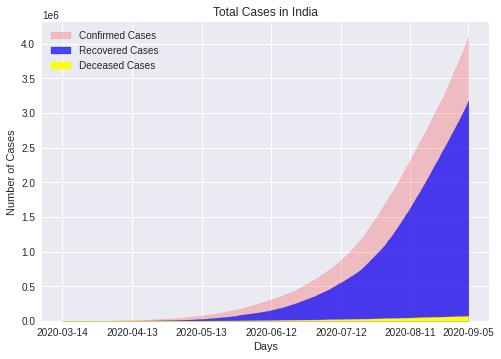

In [ ]:
def Q2_1(json_file_path, start_date, end_date):
    #Loading the given json format as dictionary type into the variable 'data' using the 'json.load' function
    #we get a dictionary with only one key whose format is as follows - {'states_daily':[list of other dictionaries]}
    with open(json_file_path) as data_file:    
        data = json.load(data_file)
    #'data' has one key whole value is the list of dictionaries which further have same 'keys' like 'date','status' , etc. with
    #different values like '14-Mar-20','Confirmed'
    #now Normalizing the keys as columns for each of the dictionaries present in the list of dictionaries of value of data
    my_data=pd.json_normalize(data.get('states_daily'))
    #changing the format of date given in the assignment
    my_data['date']=pd.to_datetime(my_data['date'])
    #sorting our datset according to the date just in case if it is not sorted already
    my_data=my_data.sort_values(by=['date'],ascending=True)   
    #typecasting the start_date and end_date into our standard pandas datetime object
    start_date=pd.to_datetime(start_date)
    end_date=pd.to_datetime(end_date)
    #Getting the indexes of rows with start_date and end_date
    startList=my_data[my_data['date']==start_date].index.values
    endList=my_data[my_data['date']==end_date].index.values
    my_data=my_data.loc[startList[0]:endList[len(endList)-1],:]
    
    #Reordering the columns
    cols=list(my_data.keys())
    ttL=cols.index('tt')
    cols=cols[:ttL]+cols[ttL+1:]
    cols.insert(0,'tt')
    statusL=cols.index('status')
    cols=cols[:statusL]+cols[statusL+1:]
    cols.insert(0,'status')
    dateL=cols.index('date')
    cols=cols[:dateL]+cols[dateL+1:]
    cols.insert(0,'date')
    
    #Reordering the columns in our dataframe 'my_data'
    my_data=my_data[cols]
    #Adding the new column for total cases
    my_data['total_cases']=0
    for i in range(3,41):
        my_data['total_cases']=my_data['total_cases']+my_data[cols[i]].astype('int')
    total_count=my_data['total_cases'].sum(axis=0,skipna=True)
    #Changing the position of the column 'total_cases' from last to initial
    #reordering the columns
    cols=list(my_data.keys())
    dateL=cols.index('total_cases')
    cols=cols[:dateL]+cols[dateL+1:]
    cols.insert(0,'total_cases')
    #reordering the columns in our dataframe 'my_data'
    my_data=my_data[cols]
    my_data=my_data.drop(['tt'],axis=1)
    #making our x axis
    x_axis=list(my_data['date'].astype('str'))
    
    #removing the duplicates from our x axis
    x_axis_new=[]
    for i in x_axis:
        if i not in x_axis_new:
            x_axis_new.append(i)

    #making a dictionary of dates as values and their indexes as keys in the list x_axis_new
    x_axis_temp={}
    for i in range(len(x_axis_new)):
        x_axis_temp[i]=x_axis_new[i]
    #Rows with 'Confirmed' status
    #changing the style of the graph for better representation
    plt.style.use('seaborn')
    confirmRows=my_data[my_data['status']=='Confirmed'].iloc[:,0:3]
    #Cumulating the column 'tt' along the rows
    confirmRows['total_cases']=confirmRows['total_cases'].cumsum(axis=0,skipna=True)
    confirmed_List=list(confirmRows['total_cases'])
    plt.stackplot(list(x_axis_temp.keys()),confirmed_List,color='red',alpha=0.2, labels=['Confirmed Cases'])
    #Rows with 'Recovered' status
    recoveredRows=my_data[my_data['status']=='Recovered'].iloc[:,0:3]
    #Cumulating the column 'tt' along the rows
    recoveredRows['total_cases']=recoveredRows['total_cases'].cumsum(axis=0,skipna=True)
    recovered_List=list(recoveredRows['total_cases'])
    plt.stackplot(list(x_axis_temp.keys()),recovered_List,color='blue',alpha=0.7,labels=['Recovered Cases'])
    #Rows with 'Deceased' status
    deceasedRows=my_data[my_data['status']=='Deceased'].iloc[:,0:3]
    deceasedRows['total_cases']=deceasedRows['total_cases'].cumsum(axis=0,skipna=True)
    deceased_List=list(deceasedRows['total_cases'])
    #Plotting the graph
    #Changing the intervals on x axis which are the indexes correspnding to each date with date itself
    #however, changing all of it will clutter the x axis and hence just taking specific points at regular interval
    #to neatly show it on the graph ex- 0 on x-axis corresponds to '2020-03-14' and 175 corresponds to '2020-09-05'
    plt.stackplot(list(x_axis_temp.keys()),deceased_List,color='yellow',alpha=1,labels=["Deceased Cases"])
    plt.xticks([0,30,60,90,120,150,175],[x_axis_new[0],x_axis_new[30],x_axis_new[60],x_axis_new[90],x_axis_new[120],x_axis_new[150],x_axis_new[175]]) 
    
    #adding the labels on our x and y axes
    plt.xlabel('Days')
    plt.ylabel('Number of Cases')
    
    #adding the title to the graph
    plt.title('Total Cases in India')
    
    #adding the labels of each area in the graph using legen function
    plt.legend(loc='upper left')
    plt.savefig('Question_2_Part_1.jpg')
    plt.show()
    

start_date='14-Mar-2020'
end_date='05-sep-2020'
json_file_path='states_daily.json'
Q2_1(json_file_path,start_date,end_date)


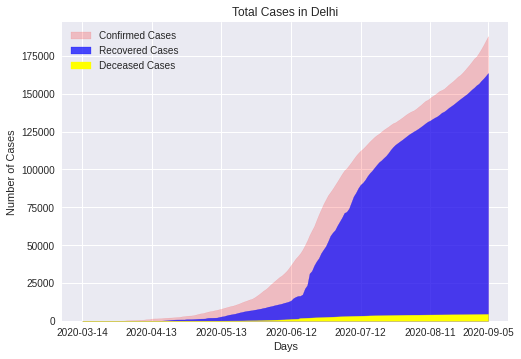

In [ ]:
def Q2_2(json_file_path, start_date, end_date):

    #Loading the given json format as dictionary type into the variable 'data' using the 'json.load' function
    #we get a dictionary with only one key whose format is as follows - {'states_daily':[list of other dictionaries]}
    with open(json_file_path) as data_file:    
        data = json.load(data_file)
    #now 'data' has one key whole value is the list of dictionaries which further have same 'keys' like 'date','status' , etc. with
    #different values like '14-Mar-20','Confirmed'
    #now normalizing the keys as columns for each of the dictionaries present in the list of dictionaries of value of data
    my_data=pd.json_normalize(data.get('states_daily'))
    #changing the format of date given in the assignment
    my_data['date']=pd.to_datetime(my_data['date'])
    #sorting our datset according to the date just in case if it is not sorted already
    my_data=my_data.sort_values(by=['date'],ascending=True)
    #typecasting the start_date and end_date into our standard pandas datetime object
    start_date=pd.to_datetime(start_date)
    end_date=pd.to_datetime(end_date)
    #Getting the indexes of rows with start_date and end_date
    startList=my_data[my_data['date']==start_date].index.values
    endList=my_data[my_data['date']==end_date].index.values
    #Slicing our data set between the given dates and the columns 'status' and 'date'
    my_data=my_data.loc[startList[0]:endList[len(endList)-1],:]
    
    #we just need the 'dl' column along with date and status in our new dataset
    my_data=my_data.loc[:,['status','dl','date']]
    #converting the 'dl' column into 'int'
    #converting the 'tt' column in 'my_data' to integer 
    convert_dict={
        'dl':'int'
    }
    my_data=my_data.astype(convert_dict)
    #creating our x axis for the plot
    x_axis=list(my_data['date'].astype('str'))
    #removing the duplicates from our x axis
    x_axis_new=[]
    for i in x_axis:
        if i not in x_axis_new:
            x_axis_new.append(i)

    #making a dictionary of dates as values and their indexes as keys in the list x_axis_new
    x_axis_temp={}
    for i in range(len(x_axis_new)):
        x_axis_temp[i]=x_axis_new[i]

    #Rows with 'Confirmed' status
    confirmRows=my_data[my_data['status']=='Confirmed'].iloc[:,0:2]
    #Cumulating the column 'tt' along the rows
    confirmRows['dl']=confirmRows['dl'].cumsum(axis=0,skipna=True)
    confirmed_List=list(confirmRows['dl'])
    #Rows with 'Recovered' status
    recoveredRows=my_data[my_data['status']=='Recovered'].iloc[:,0:2]
    recoveredRows['dl']=recoveredRows['dl'].cumsum(axis=0,skipna=True)
    recovered_List=list(recoveredRows['dl'])
    #Rows with 'Deceased' status
    deceasedRows=my_data[my_data['status']=='Deceased'].iloc[:,0:2]
    deceasedRows['dl']=deceasedRows['dl'].cumsum(axis=0,skipna=True)
    deceased_List=list(deceasedRows['dl'])

    #plotting the graph
    plt.style.use('seaborn')
    plt.stackplot(list(x_axis_temp.keys()),confirmed_List,color='red',alpha=0.2, labels=['Confirmed Cases'])
    plt.stackplot(list(x_axis_temp.keys()),recovered_List,color='blue',alpha=0.7,labels=['Recovered Cases'])
    plt.stackplot(list(x_axis_temp.keys()),deceased_List,color='yellow',alpha=1,labels=["Deceased Cases"])
    
    #Changing the intervals on x axis which are the indexes correspnding to each date with date itself
    #however, changing all of it will clutter the x axis and hence Taking specific points at regular interval
    #to neatly show it on the graph ex- 0 on x-axis corresponds to '2020-03-14' and 175 corresponds to '2020-09-05'
    plt.xticks([0,30,60,90,120,150,175],[x_axis_new[0],x_axis_new[30],x_axis_new[60],x_axis_new[90],x_axis_new[120],x_axis_new[150],x_axis_new[175]]) 
    #adding the labels on our x and y axes
    plt.xlabel('Days')
    plt.ylabel('Number of Cases')
    #adding the title to the graph
    plt.title('Total Cases in Delhi')
    #adding the labels of each area in the graph using legen function
    plt.legend(loc='upper left')
    plt.savefig('Question_2_Part_2.jpg')
    plt.show()
    
start_date='14-Mar-2020'
end_date='05-sep-2020'
json_file_path='states_daily.json'
Q2_2(json_file_path,start_date,end_date)
    


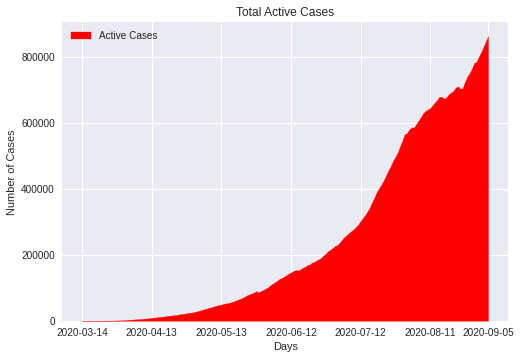

In [ ]:
def Q2_3(json_file_path, start_date, end_date):

    #Loading the given json format as dictionary type into the variable 'data' using the 'json.load' function
    #we get a dictionary with only one key whose format is as follows - {'states_daily':[list of other dictionaries]}
    with open(json_file_path) as data_file:    
        data = json.load(data_file)
    #'data' has one key whole value is the list of dictionaries which further have same 'keys' like 'date','status' , etc. with
    #different values like '14-Mar-20','Confirmed'
    #now Normalizing the keys as columns for each of the dictionaries present in the list of dictionaries of value of data
    my_data=pd.json_normalize(data.get('states_daily'))
    #changing the format of date given in the assignment
    my_data['date']=pd.to_datetime(my_data['date'])
    #sorting our datset according to the date just in case if it is not sorted already
    my_data=my_data.sort_values(by=['date'],ascending=True)
    #typecasting the start_date and end_date into our standard pandas datetime object
    start_date=pd.to_datetime(start_date)
    end_date=pd.to_datetime(end_date)
    #Getting the indexes of rows with start_date and end_date
    startList=my_data[my_data['date']==start_date].index.values
    endList=my_data[my_data['date']==end_date].index.values
    my_data=my_data.loc[startList[0]:endList[len(endList)-1],:]

    #Reordering the columns
    cols=list(my_data.keys())
    ttL=cols.index('tt')
    cols=cols[:ttL]+cols[ttL+1:]
    cols.insert(0,'tt')
    statusL=cols.index('status')
    cols=cols[:statusL]+cols[statusL+1:]
    cols.insert(0,'status')
    dateL=cols.index('date')
    cols=cols[:dateL]+cols[dateL+1:]
    cols.insert(0,'date')
    
    #Reordering the columns in our dataframe 'my_data'
    my_data=my_data[cols]

    #adding the new column for total cases
    my_data['total_cases']=0
    for i in range(3,41):
        my_data['total_cases']=my_data['total_cases']+my_data[cols[i]].astype('int')
    total_count=my_data['total_cases'].sum(axis=0,skipna=True)

    #Changing the position of the column 'total_cases' from last to initial
    #Reordering the columns
    cols=list(my_data.keys())
    dateL=cols.index('total_cases')
    cols=cols[:dateL]+cols[dateL+1:]
    cols.insert(0,'total_cases')
    #Reordering the columns in our dataframe 'my_data'
    my_data=my_data[cols]
    my_data=my_data.drop(['tt'],axis=1)
    
    #creating x axis for the plot
    #creating our x axis for the plot
    x_axis=list(my_data['date'].astype('str'))
    #removing the duplicates from our x axis
    x_axis_new=[]
    for i in x_axis:
        if i not in x_axis_new:
            x_axis_new.append(i)

    #making a dictionary of dates as values and their indexes as keys in the list x_axis_new
    x_axis_temp={}
    for i in range(len(x_axis_new)):
        x_axis_temp[i]=x_axis_new[i]

    #Rows with 'Confirmed' status
    confirmRows=my_data[my_data['status']=='Confirmed']
    confirmRows=my_data[my_data['status']=='Confirmed']
    finalDataFrame=confirmRows.rename(columns={'total_cases':'total_cases_confirmed'})
    #Rows with 'Recovered' status
    recoveredRows=my_data[my_data['status']=='Recovered']
    recoveredList=list(recoveredRows['total_cases'])
    finalDataFrame['total_cases_recovered']=recoveredList
    #Rows with 'Deceased' status
    deceasedRows=my_data[my_data['status']=='Deceased']
    deceasedList=list(deceasedRows['total_cases'])
    finalDataFrame['total_cases_deceased']=deceasedList
    
    #Dropping other columns which are not useful for our analysis
    finalDataFrame=finalDataFrame[['date','status','total_cases_confirmed','total_cases_recovered','total_cases_deceased']]
    finalDataFrame['R+D']=finalDataFrame['total_cases_recovered']+finalDataFrame['total_cases_deceased']
    finalDataFrame['total_cases_active']=finalDataFrame['total_cases_confirmed']-finalDataFrame['R+D']
    activeList=list(finalDataFrame['total_cases_active'])
    #you can see there are negative values also in the list as expected
    #now getting the cumulative active list
    finalDataFrame['total_cases_active']=finalDataFrame['total_cases_active'].cumsum(axis=0,skipna=True)

    # y axis of the plot is
    final_List=list(finalDataFrame['total_cases_active'])
    plt.style.use('seaborn')
    plt.stackplot(list(x_axis_temp.keys()),final_List,color='red',alpha=1, labels=['Active Cases'])
    plt.xticks([0,30,60,90,120,150,175],[x_axis_new[0],x_axis_new[30],x_axis_new[60],x_axis_new[90],x_axis_new[120],x_axis_new[150],x_axis_new[175]]) 
    #adding the labels on our x and y axes
    plt.xlabel('Days')
    plt.ylabel('Number of Cases')
    #adding the title to the graph
    plt.title('Total Active Cases')
    #adding the labels of each area in the graph using legen function
    plt.legend(loc='upper left')
    plt.show()
    
    
start_date='14-Mar-2020'
end_date='05-sep-2020'
json_file_path='states_daily.json'
Q2_3(json_file_path,start_date,end_date)



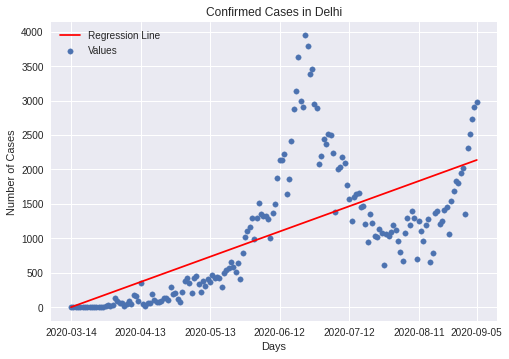

Confirmed Slope : 12.214269205370902    Confirmed Intercept : 0.5298536209550093


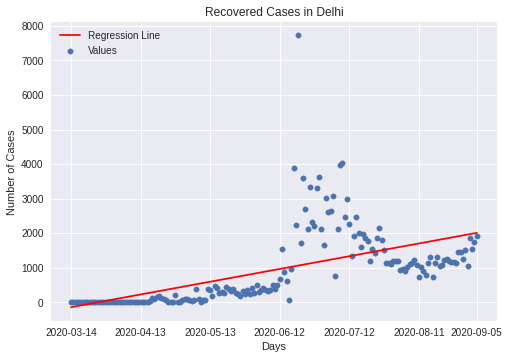

Recovered Slope : 12.305528285274045    Recovered Intercept : -146.13713405238798


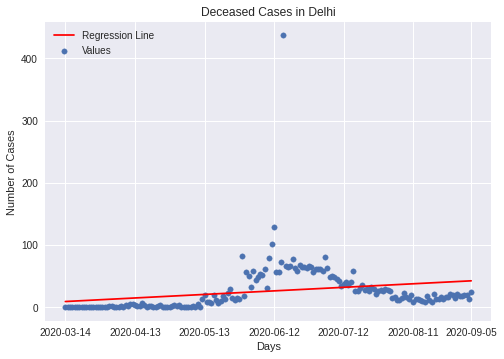

Deceased Slope : 0.19023332599603782    Deceased Intercept : 9.138674884437602


(0.5298536209550093,
 12.214269205370902,
 -146.13713405238798,
 12.305528285274045,
 9.138674884437602,
 0.19023332599603782)

In [ ]:
def Q3(json_file_path, start_date, end_date):
  #Loading the Dataset given in json format as dictionary type into the variable 'state_data' using the 'json.load' function
  data = open(json_file_path)
  #'state_data' has one key 'state_daily' and the whole value is the list of dictionaries which further have same 'keys' like 'date','status' , etc. with
  #different values like '14-Mar-20','Confirmed',etc.
  #now Normalizing the keys as columns for each of the dictionaries present in the list of dictionaries of value of state_data
  state_data = json.load(data)
  state_data=pd.json_normalize(state_data.get('states_daily'))
  #typecasting the start_date and end_date into our standard pandas datetime object
  start_d = pd.to_datetime(start_date)
  end_d = pd.to_datetime(end_date)
  #changing the format of date given in the assignment
  state_data['date'] = pd.to_datetime(state_data['date'])
  #getting the index values of the rows with starting and the Ending date
  start_i = state_data[state_data['date'] == start_d].index.values
  end_i = state_data[state_data['date'] == end_d].index.values
  #Dropping the unused columns ahead
  state_data = state_data.drop('tt', axis=1) 
  s_i = start_i[0]
  e_i = end_i[2]+1
  #Removing the rows which are not under the Start and the End date
  state_data = state_data.iloc[s_i:e_i]
  #Creating the set with Dates in it from starting to ending date
  dates = set(state_data['date'])
  #changing the dates in the format %Y-%m-%d
  dates = set([date.strftime("%Y-%m-%d") for date in dates])
  dates = sorted(dates)
  #Create the Dictionaries for respective cases with Dates as the Key and Values as the respective cases which are initialised with 0
  dates_rec = dict.fromkeys(dates,0)
  dates_con = dict.fromkeys(dates,0)
  dates_dec = dict.fromkeys(dates,0)
  #Changing the datatype of the values of all the columns to Int
  status = state_data.pop("status")
  date = state_data.pop("date")
  state_data = state_data.astype('int')
  state_data.insert(0,"status",status)
  #Changing the datatype of the values of column Status to String
  state_data['status'] = state_data['status'].astype('string')
  state_data.insert(0,"date",date)
  #Storing the respective cases for Delhi for each date from starting to ending and storing in the respective values of the dictionaries where key is date.
  for i in state_data.index:
    if(state_data['status'][i] == "Recovered"):
      dates_rec[state_data['date'][i].strftime("%Y-%m-%d")] = state_data['dl'][i]
    elif(state_data['status'][i] == "Confirmed"):
      dates_con[state_data['date'][i].strftime("%Y-%m-%d")] = state_data['dl'][i]
    elif(state_data['status'][i] == "Deceased"):
      dates_dec[state_data['date'][i].strftime("%Y-%m-%d")] = state_data['dl'][i]
  
  #Plotting For the Confirmed Cases
  #Getting the values from the Dictionary storing the Confirmed Cases for respective dates
  dates_con= sorted(dates_con.items())
  #X contains the Date and Y contains the Cases
  X,Y = zip(*dates_con)
  x_axis_dates=X
  #Creating a list of the number of days from start to end date
  end = int((e_i+1)/3)
  X = list(range(s_i,end))
 
  #Converting from class tuple to numpy array
  X = np.array(X)
  Y = np.array(Y)
  confirmed_values = Linear_Regression(X,Y)
  confirmed_slope=confirmed_values[0]
  confirmed_intercept = confirmed_values[1]
  #Calculating the Predicted Values from the obtained slopes and intercept
  Y_pred = confirmed_slope*X + confirmed_intercept
  #plotting the actual data points

  #changinge the style of graph for better visualization 
  plt.style.use('seaborn')
  plt.scatter(X,Y,s=30,label='Values')
  #plotting the Regression Line
  plt.plot(X,Y_pred,color="red",label='Regression Line')
  plt.xticks([0,30,60,90,120,150,175],[x_axis_dates[0],x_axis_dates[30],x_axis_dates[60],x_axis_dates[90],x_axis_dates[120],x_axis_dates[150],x_axis_dates[175]])
  #Adding the Label to the graph
  plt.xlabel('Days')
  plt.ylabel('Number of Cases')
  #adding the title to the graph
  plt.title('Confirmed Cases in Delhi')
  plt.savefig('Question_3_Part_1.jpg')
  plt.legend(loc='upper left')
  plt.show()
  print("Confirmed Slope :", confirmed_slope, "   Confirmed Intercept :", confirmed_intercept)

  #Plotting For the Recovered Cases
  #Getting the values from the Dictionary storing the Recovered Cases for respective dates
  dates_rec= sorted(dates_rec.items())
  #X contains the Date and Y contains the Cases
  X,Y = zip(*dates_rec)
  #Creating a list of the number of days from start to end date
  end = int((e_i+1)/3)
  X = list(range(s_i,end))
  #Converting from class tuple to numpy array
  X = np.array(X)
  Y = np.array(Y)
  recovered_values = Linear_Regression(X,Y)
  recovered_slope=recovered_values[0]
  recovered_intercept = recovered_values[1]
  #Calculating the Predicted Values from the obtained slopes and intercept
  Y_pred = recovered_slope*X + recovered_intercept
  #plotting the actual data points
  plt.scatter(X,Y,s=30,label='Values')
  #plotting the Regression Line
  plt.plot(X,Y_pred,color="red",label="Regression Line")
  plt.xticks([0,30,60,90,120,150,175],[x_axis_dates[0],x_axis_dates[30],x_axis_dates[60],x_axis_dates[90],x_axis_dates[120],x_axis_dates[150],x_axis_dates[175]])
  #Adding the Label to the graph
  plt.xlabel('Days')
  plt.ylabel('Number of Cases')
  #adding the title to the graph
  plt.title('Recovered Cases in Delhi')
  plt.legend(loc='upper left')
  plt.savefig('Question_3_Part_2.jpg')
  plt.show()
  print("Recovered Slope :", recovered_slope, "   Recovered Intercept :", recovered_intercept)

  #Plotting For the Deceased Cases
  #Getting the values from the Dictionary storing the Deceased Cases for respective dates
  dates_dec= sorted(dates_dec.items())
  #X contains the Date and Y contains the Cases
  X,Y = zip(*dates_dec)
  #Creating a list of the number of days from start to end date
  end = int((e_i+1)/3)
  X = list(range(s_i,end))
  #Converting from class tuple to numpy array
  X = np.array(X)
  Y = np.array(Y)
  deceased_values= Linear_Regression(X,Y)
  deceased_slope=deceased_values[0]
  deceased_intercept = deceased_values[1]
  #Calculating the Predicted Values from the obtained slopes and intercept
  Y_pred = deceased_slope*X + deceased_intercept
  #plotting the actual data points
  plt.scatter(X,Y,s=30,label='Values')
  #plotting the Regression Line
  plt.plot(X,Y_pred,color="red",label="Regression Line")
  plt.xticks([0,30,60,90,120,150,175],[x_axis_dates[0],x_axis_dates[30],x_axis_dates[60],x_axis_dates[90],x_axis_dates[120],x_axis_dates[150],x_axis_dates[175]])
  #Adding the Label to the graph
  plt.xlabel('Days')
  plt.ylabel('Number of Cases')
  #adding the title to the graph
  plt.title('Deceased Cases in Delhi')
  plt.legend(loc='upper left')
  plt.savefig('Question_3_Part_3.jpg')
  plt.show()
  print("Deceased Slope :", deceased_slope, "   Deceased Intercept :", deceased_intercept)
  return confirmed_intercept, confirmed_slope, recovered_intercept, recovered_slope, deceased_intercept, deceased_slope
  
def Linear_Regression(X, Y):
  #Mean of X-days and Y-cases 
  X_mean_days = np.mean(X)
  Y_mean_cases = np.mean(Y)
  #initializing x which is the sum of cross-deviations and y which is the sum of deviations of x as 0 ,0
  (x,y)=(0,0)
  #Using the Least Squared Error,
  #x is the sum of cross-deviations of y and x where we add the product of (X-X[mean])*(Y-Y[mean]) for n observations.
  #y is the sum of deviations of x where we add the product of (X-X[mean])^2 for n observations.
  n=len(X)
  i=0
  while i<n:
      x += (X[i] - X_mean_days)*(Y[i] - Y_mean_cases)
      y += (X[i] - X_mean_days)**2
      i+=1
  #calculating the Slope and the Intercept
  theta=np.array([0.0,0.0])
  theta[0] = x/y
  theta[1] = Y_mean_cases - theta[0]*X_mean_days
  #return slope and intercept
  return theta
  
json_file_path = "states_daily.json"
start_date = '14-Mar-2020'
end_date = '05-Sep-2020' 
Q3(json_file_path, start_date, end_date)
# """
# We have specifically referred the below to tutorials to understand and then implement the linear regression code- 
# 1) https://www.geeksforgeeks.org/linear-regression-python-implementation/
# 2) https://towardsdatascience.com/linear-regression-using-least-squares-a4c3456e8570

# """

MT20054
2016006
confirmed_count:  4110214 recovered_count:  3177666 deceased_count:  70095
confirmed_count:  188193 recovered_count:  163785 deceased_count:  4538
confirmed_count:  1072055 recovered_count:  800359 deceased_count:  30813

Confirmed
Highest affected State is:  ['mh']
Highest affected State count is:  883862

Recovered 
Highest affected State is:  ['mh']
Highest affected State count is:  636574

Deceased 
Highest affected State is:  ['mh']
Highest affected State count is:  26275

Confirmed
Lowest affected State is:  ['mz']
Lowest affected State count is:  1062

Recovered
Lowest affected State is:  ['mz']
Lowest affected State count is:  713

Deceased
Lowest affected State is:  ['mz']
Lowest affected State count is:  0
Confirmed
 Day: 23-Jun-2020 
 Count: 3947
Recovered
 Day: 20-Jun-2020 
 Count: 7725
Deceased
 Day: 16-Jun-2020 
 Count: 437
Active cases on 05-Sep-2020
States     Active Cases
gj         16266     
ka         100224    
ar         1525      
ml         1374 

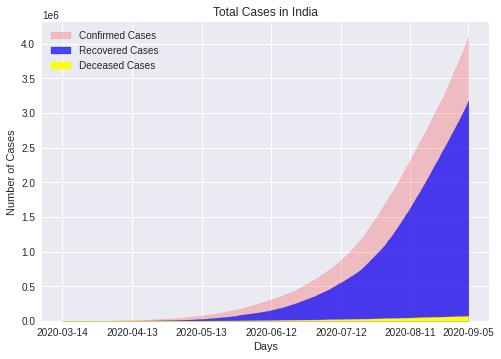

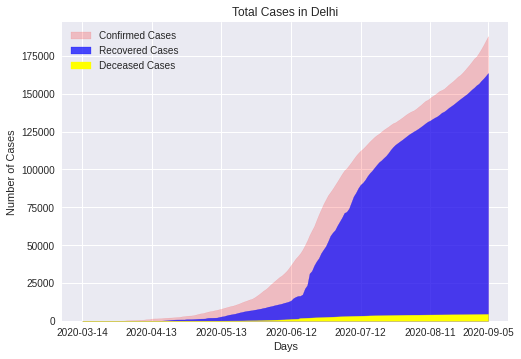

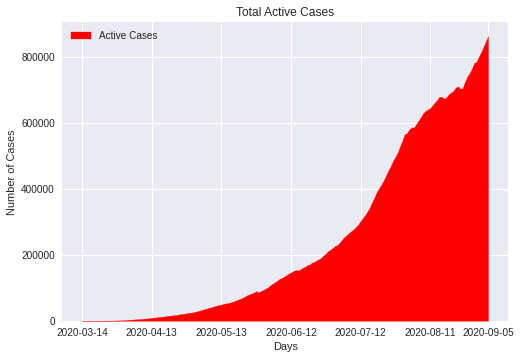

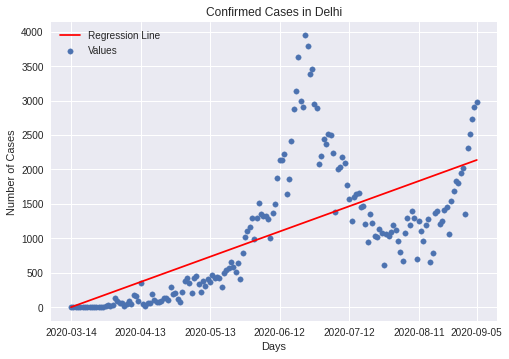

Confirmed Slope : 12.214269205370902    Confirmed Intercept : 0.5298536209550093


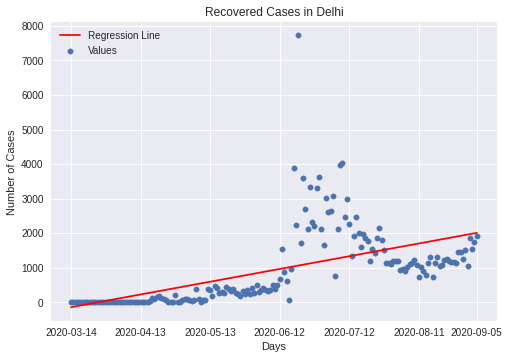

Recovered Slope : 12.305528285274045    Recovered Intercept : -146.13713405238798


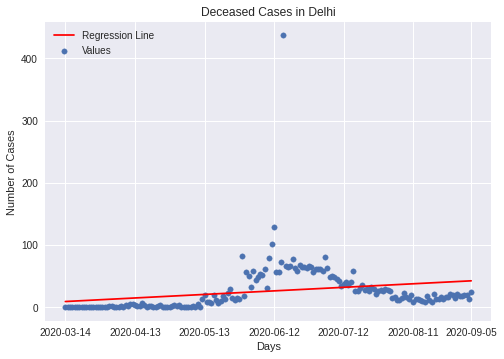

Deceased Slope : 0.19023332599603782    Deceased Intercept : 9.138674884437602


In [ ]:
if __name__ == "__main__":
    start_date = "2020-03-14"
    end_date = "2020-09-05"
    Q1_1('states_daily.json', start_date, end_date)
    Q1_2('states_daily.json', start_date, end_date)
    Q1_3('states_daily.json', start_date, end_date)
    Q1_4('states_daily.json', start_date, end_date)
    Q1_5('states_daily.json', start_date, end_date)
    Q1_6('states_daily.json', start_date, end_date)
    Q1_7('states_daily.json', start_date, end_date)
    Q2_1('states_daily.json', start_date, end_date)
    Q2_2('states_daily.json', start_date, end_date)
    Q2_3('states_daily.json', start_date, end_date)
    Q3('states_daily.json', start_date, end_date)


    
